In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In /home/manikanta/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manikanta/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manikanta/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/manikanta/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manikanta/.local/lib/python3.6/site-packages/matplo

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv("/home/manikanta/Documents/ML/classification/Random Forest/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Exploratory Data Analysis (EDA)

In [4]:
df.tail(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.shape

(51717, 17)

In [9]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
zomato=df.drop(['url','dish_liked','phone'],axis=1)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
zomato.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

In [12]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
zomato.votes = zomato.votes.astype('int')
zomato['approx_cost_for_2_people'] = zomato['approx_cost_for_2_people'].apply(remove_comma)

In [13]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   51717 non-null  object 
 1   name                      51717 non-null  object 
 2   online_order              51717 non-null  object 
 3   book_table                51717 non-null  object 
 4   rate                      43942 non-null  object 
 5   votes                     51717 non-null  int64  
 6   location                  51696 non-null  object 
 7   rest_type                 51490 non-null  object 
 8   cuisines                  51672 non-null  object 
 9   approx_cost_for_2_people  51371 non-null  float64
 10  reviews_list              51717 non-null  object 
 11  menu_item                 51717 non-null  object 
 12  listed_in_type            51717 non-null  object 
 13  listed_in_city            51717 non-null  object 
dtypes: flo

In [14]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)

In [16]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

In [17]:
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [18]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   49440 non-null  object 
 1   name                      49440 non-null  object 
 2   online_order              49440 non-null  object 
 3   book_table                49440 non-null  object 
 4   rate                      41665 non-null  float64
 5   votes                     49440 non-null  int64  
 6   location                  49419 non-null  object 
 7   rest_type                 49215 non-null  object 
 8   cuisines                  49395 non-null  object 
 9   approx_cost_for_2_people  49099 non-null  float64
 10  reviews_list              49440 non-null  object 
 11  menu_item                 49440 non-null  object 
 12  listed_in_type            49440 non-null  object 
 13  listed_in_city            49440 non-null  object 
dtypes: flo

In [20]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

In [21]:
zomato_en['rate'] = zomato_en['rate'].fillna(zomato_en['rate'].mean())
zomato_en['approx_cost_for_2_people'] = zomato_en['approx_cost_for_2_people'].fillna(zomato_en['approx_cost_for_2_people'].mean())

In [22]:
zomato_en.isna().sum()

address                     0
name                        0
online_order                0
book_table                  0
rate                        0
votes                       0
location                    0
rest_type                   0
cuisines                    0
approx_cost_for_2_people    0
reviews_list                0
menu_item                   0
listed_in_type              0
listed_in_city              0
dtype: int64

<AxesSubplot:>

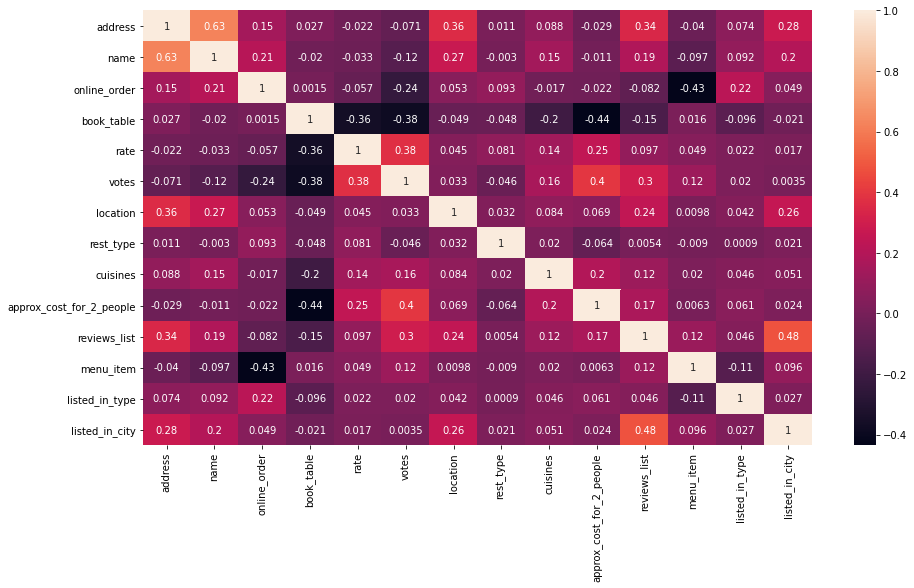

In [23]:
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [24]:
zomato_en.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

In [25]:
zomato_en['location'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, -1,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92])

# Data Visualization

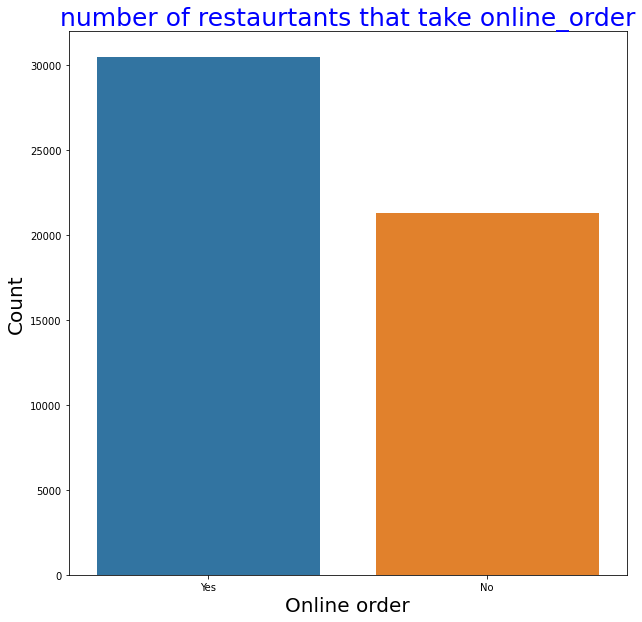

In [26]:
# Number of restaurtants that take online order
plt.figure(figsize=(10,10))

sns.countplot(df['online_order'])
plt.title("number of restaurtants that take online_order",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Online order",fontsize=20)
plt.show()

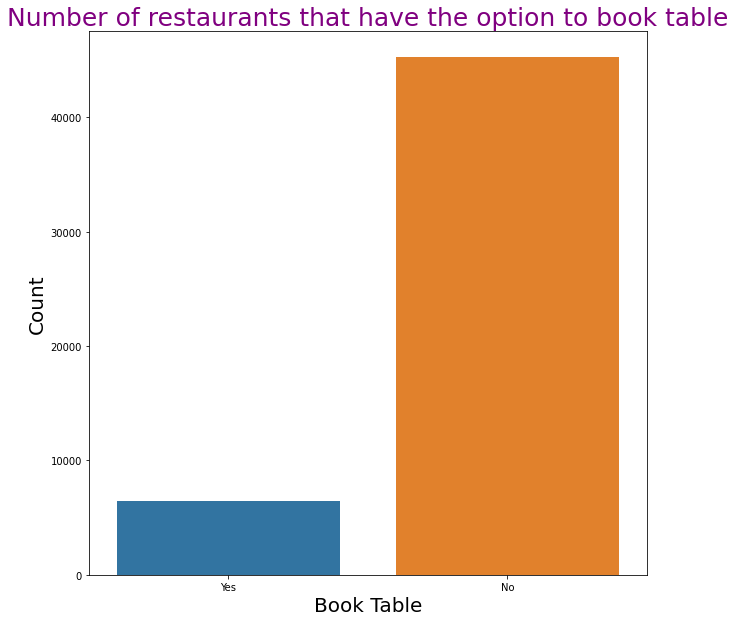

In [27]:
# number of restaurants that have the option to book table
plt.figure(figsize=(10,10))

sns.countplot(df['book_table'])
plt.title("Number of restaurants that have the option to book table",fontsize=25,color='purple')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Book Table",fontsize=20)
plt.show()

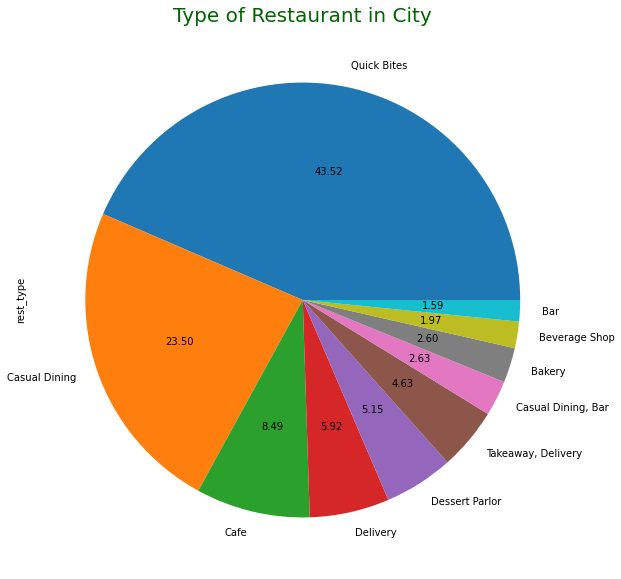

In [32]:
# Type of Restaurant in City
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
label=df['rest_type'].value_counts()[:10].index
ax.plot(kind='pie',labels=label,autopct='%.2f')

plt.title("Type of Restaurant in City",fontsize=20,color='darkgreen')
plt.show()

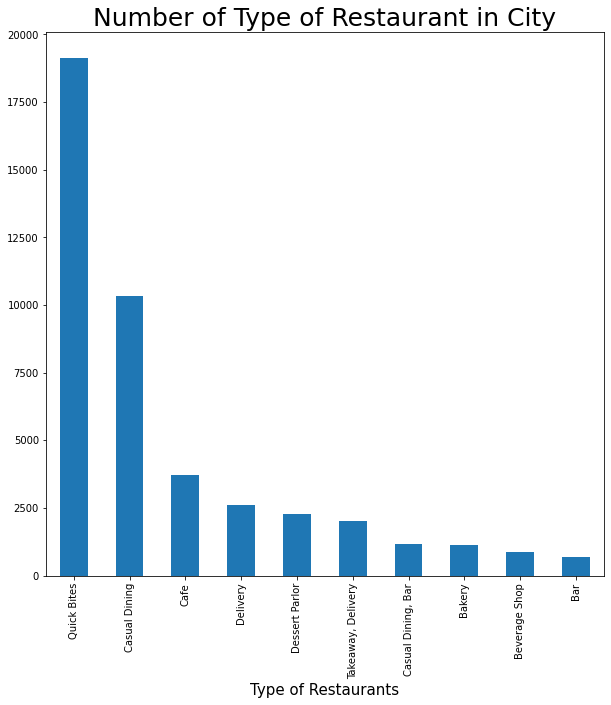

In [33]:
# Number of Type of Restaurant in City
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Number of Type of Restaurant in City",fontsize=25)
plt.xlabel("Type of Restaurants",fontsize=15)
plt.show()

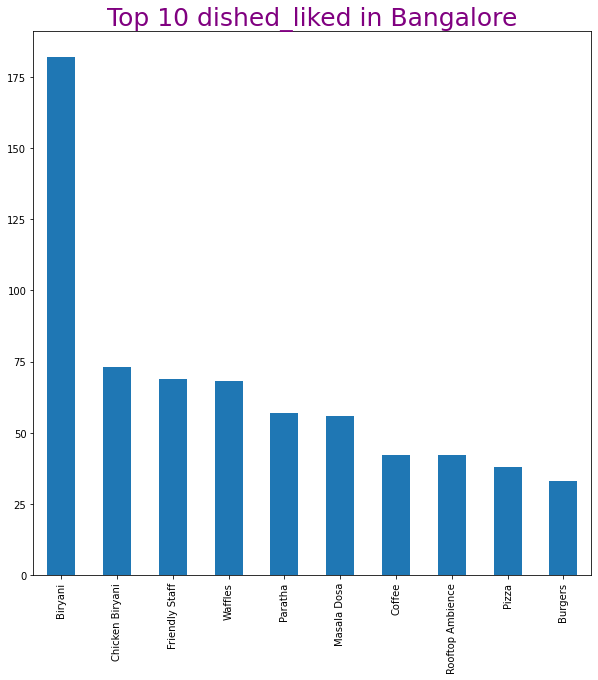

In [35]:
# Top 10 dished_liked in Bangalore
plt.figure(figsize=(10,10))
ax=df['dish_liked'].value_counts()[:10]
ax.plot(kind='bar')
plt.title("Top 10 dished_liked in Bangalore",fontsize=25,color='purple')
plt.show()

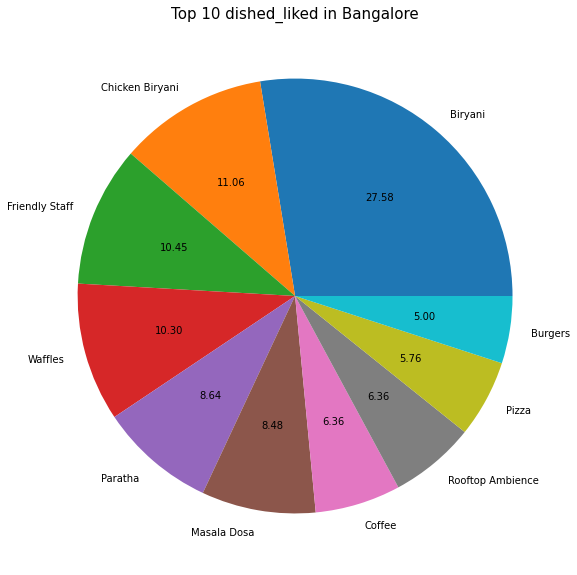

In [36]:
plt.figure(figsize=(10,10))
ax=df.dish_liked.value_counts()[:10]
label=df['dish_liked'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("Top 10 dished_liked in Bangalore",fontsize=15)
plt.show()

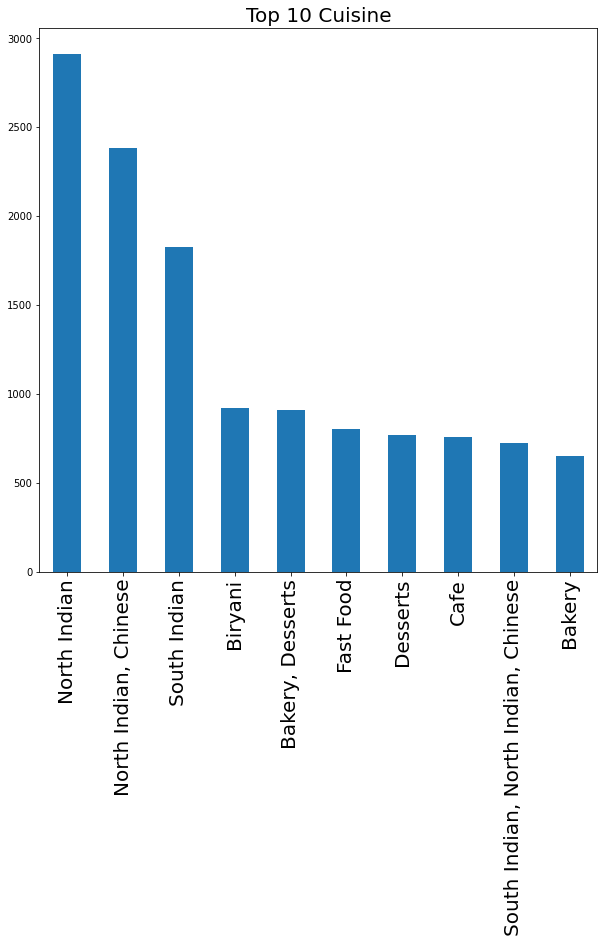

In [37]:
# Top 10 Cuisine
plt.figure(figsize=(10,10))

ax=df.cuisines.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Top 10 Cuisine",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

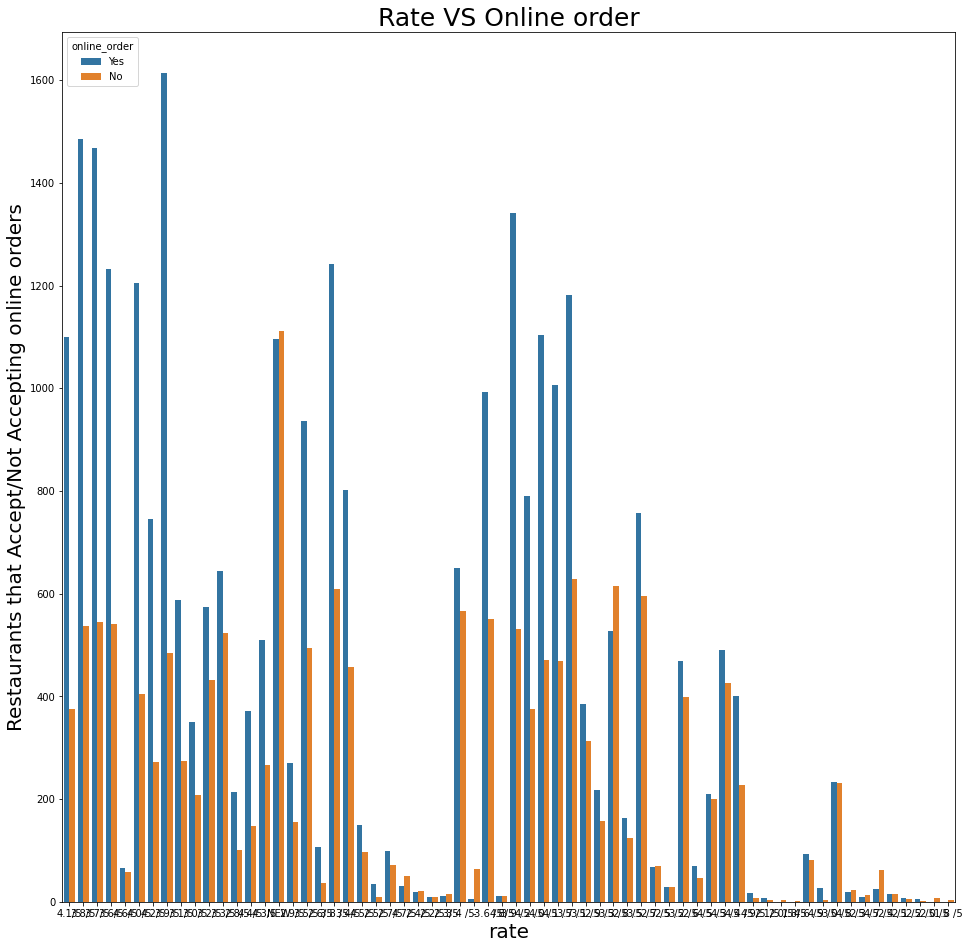

In [38]:
# Rate VS Online Order
plt.figure(figsize=(16,16))

sns.countplot(x=df['rate'],hue=df['online_order'])
plt.title("Rate VS Online order",fontsize=25)
plt.ylabel("Restaurants that Accept/Not Accepting online orders",fontsize=20)
plt.xlabel("rate",fontsize=20)
plt.show()

In [39]:
zomato_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_people,reviews_list,menu_item,listed_in_type,listed_in_city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


In [40]:
zomato_en['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70044882, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

# Data Transformation

In [41]:
# Feature Selection and Feature Scaling
#Drop null values
zomato_en.dropna(how='any',inplace=True)
zomato_en.shape

(49440, 14)

In [42]:
# selecing features
features=zomato_en.drop(['rate'],axis=1)
features.shape

(49440, 13)

In [43]:
features.dtypes

address                       int64
name                          int64
online_order                  int64
book_table                    int64
votes                         int64
location                      int64
rest_type                     int64
cuisines                      int64
approx_cost_for_2_people    float64
reviews_list                  int64
menu_item                     int64
listed_in_type                int64
listed_in_city                int64
dtype: object

In [44]:
zomato_en['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70044882, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [45]:
# selecting Class/ Label
label=zomato_en['rate'].values
label

array([4.1       , 4.1       , 3.8       , ..., 3.70044882, 4.3       ,
       3.4       ])

# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [47]:
features=StandardScaler().fit(features).transform(features)
features

array([[-1.61463703, -1.41387232, -0.82762112, ..., -0.46675178,
        -2.45730515, -1.81536425],
       [-1.61427647, -1.41340856, -0.82762112, ..., -0.46675178,
        -2.45730515, -1.81536425],
       [-1.61391591, -1.41294481, -0.82762112, ..., -0.46675178,
        -2.45730515, -1.81536425],
       ...,
       [ 2.33457469,  2.50809641,  1.20828236, ..., -0.46675178,
         2.79170293,  1.8095947 ],
       [ 2.36702508,  2.50624139,  1.20828236, ..., -0.46675178,
         2.79170293,  1.8095947 ],
       [-0.11939545,  2.50670515,  1.20828236, ..., -0.46675178,
         2.79170293,  1.8095947 ]])

In [48]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.10,random_state=42)

In [49]:
# Check the shape of splited data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44496, 13)
(4944, 13)
(44496,)
(4944,)


# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [51]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [52]:
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

0.27505608607089027
0.2674276286975724


In [53]:
lin_reg_pred=lin_reg.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 26.742762869757243


#  Ridge Regression

In [55]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr

Ridge()

In [56]:
rr.fit(X_train,y_train)

Ridge()

In [57]:
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))

0.27505608602082254
0.2674276395002184


In [58]:
rr_pred=rr.predict(X_test)
rr_pred

array([4.45011836, 3.64799228, 4.15889677, ..., 3.74816782, 3.76558623,
       3.69495525])

In [59]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 26.742763950021843


#  Lasso

In [60]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr

Lasso()

In [61]:
lr.fit(X_train,y_train)

Lasso()

In [62]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.0
-6.616458970265526e-06


In [63]:
lr_pred=lr.predict(X_test)

In [64]:
from sklearn.metrics import r2_score

lr_score=r2_score(y_test,lr_pred)*100
print("Accuracy score for LR :",lr_score)

Accuracy score for LR : -0.0006616458970265526


# Random Forest Regressor

In [65]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [66]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9905022450437398
0.9467524098161574


In [68]:
rfr_pred=rfr.predict(X_test)

In [70]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for RFR :",rfr_score)

Accuracy score for RFR : 94.67524098161574


# Support Vector Regression

In [71]:
from sklearn.svm import SVR

In [72]:
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [73]:
print(svr.score(X_train,y_train))
print(svr.score(X_test,y_test))

0.45119364745845103
0.42923528256001975


In [74]:
svr_pred=svr.predict(X_test)

In [75]:
from sklearn.metrics import r2_score

svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for SVR :",svr_score)

Accuracy score for SVR : 42.92352825600197


In [76]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg_score,rr_score,lr_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,26.742763
1,Ridge Reg,26.742764
2,Lasso Reg,-0.000662
3,RandomForest Reg,94.675241
4,Support Vector Reg,42.923528


# As you can see from above data "Random Forest Regressor" Given the highest Accuacry score

# PREDICT THE RATING with Random Forest Regressor Model

In [81]:
X_test

array([[-0.07432548,  0.28439533, -0.82762112, ..., -0.46675178,
         1.04203357,  0.43461027],
       [-1.54613067, -1.32390401, -0.82762112, ..., -0.46675178,
        -0.70763579, -1.81536425],
       [ 0.08143637,  0.41888403, -0.82762112, ..., -0.46675178,
         0.16719889, -0.56537841],
       ...,
       [-0.61877081, -0.28648601, -0.82762112, ...,  3.38108345,
         1.04203357,  1.55959753],
       [ 1.27669218, -0.46317634, -0.82762112, ...,  1.55232239,
        -0.70763579,  0.05961452],
       [-0.56648963, -0.23315429, -0.82762112, ...,  0.53239199,
         1.04203357, -0.94037416]])

In [82]:
pd.DataFrame({'Acutual_data':y_test,'New_data':rfr_pred})

,Acutual_data,New_data
0,4.5,4.500
1,4.1,4.088
2,4.1,4.102
3,3.3,3.271
4,2.8,2.824
...,...,...
4939,3.7,3.750
4940,3.4,3.549
4941,3.9,3.883
4942,3.7,3.617


In [83]:
rfr.predict([[1,0,13,73,1900,350,27,13,56,344,23,57,11]])

array([3.878])

# Save Ratings Sample as a CSV file

In [85]:
sample=pd.DataFrame({"Actual Ratin":y_test,
             "Predicted Rating":np.round(rfr_pred,2)})
sample

,Actual Ratin,Predicted Rating
0,4.5,4.50
1,4.1,4.09
2,4.1,4.10
3,3.3,3.27
4,2.8,2.82
...,...,...
4939,3.7,3.75
4940,3.4,3.55
4941,3.9,3.88
4942,3.7,3.62


In [86]:
sample.to_csv("Model Prediction Sample.csv",index=False)